# 헬스케어 스타트업 눔(NOOM): 회원 정보 데이터 분석 및 결과 도출

In [48]:
import pandas as pd

In [49]:
import numpy as np

## 데이터 로딩

1. 사용자의 프로필과 구매 정보 데이터

In [50]:
raw_data = pd.read_csv("noom_user.csv", parse_dates=["Purchased At"])
print(raw_data.columns)
print(raw_data.shape)
raw_data.head()

Index(['Access Code', 'Name', 'Gender', 'Age', 'Height', 'Initial Weight',
       'Lowest Weight', 'Target Weight', 'Product Name', 'Status', 'Price',
       'Purchased At', 'Payment Type', 'Channel'],
      dtype='object')
(10000, 14)


,Access Code,Name,Gender,Age,Height,Initial Weight,Lowest Weight,Target Weight,Product Name,Status,Price,Purchased At,Payment Type,Channel
0,Y9RY2VSI,김승혜,FEMALE,25.0,172.0,66.9,65.8,55.000000,눔 체중감량 프로그램,completed,112500,2017-04-14 19:03:29.976,Recurring,others
1,3GTN3S3B,허승준,MALE,26.0,176.0,70.0,NaN,65.000000,눔 체중감량 프로그램,completed,44780,2017-05-23 20:53:54.368,Recurring,others
2,6B0IG276,이지민,FEMALE,23.0,171.0,98.0,NaN,91.140000,눔 체중감량 프로그램 (천원 체험),completed,132000,2017-08-23 23:39:21.840,Recurring,facebook
3,EMGRU2MO,장설윤,FEMALE,20.0,160.0,70.7,NaN,53.000000,눔 체중감량 프로그램 (천원 체험),completed,112500,2017-08-28 20:18:22.824,Recurring,naver
4,1ELG96TX,서성빈,FEMALE,28.0,165.0,55.5,NaN,51.615002,눔 체중감량 프로그램,completed,44780,2017-05-07 17:50:30.944,Recurring,facebook


2. 코치 데이터

In [51]:
coach = pd.read_csv("noom_coach.csv", index_col="Access Code")
print(coach.shape)
coach.head()

(10000, 100)


,정은오 코치(VEV4PGJB),오승혁 코치(VENPKBP9),조소은 코치(D0WASBXN),고영재 코치(C91AVNGB),조수민 코치(OBCAO3W0),강채아 코치(WH2NIKCO),황다훈 코치(1I6IWURH),백슬은 코치(228BFB50),유채우 코치(IW53Y9AW),송지선 코치(WL0877P7),...,오초빈 코치(A3WOLAQM),서수정 코치(F36LORFC),정서율 코치(LX1G7EMD),고우재 코치(SKNL9Z4P),문한규 코치(OU1WVDGA),황세안 코치(3QUBQAVE),홍성은 코치(2I3QJQ5O),고성은 코치(34T7XPYR),백한율 코치(HPWAN8R0),안슬은 코치(QAVWJSZ1)
Access Code,,,,,,,,,,,,,,,,,,,,,
Y9RY2VSI,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3GTN3S3B,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6B0IG276,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
EMGRU2MO,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1ELG96TX,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 데이터 정리

1. 필요한 컬럼 선별

In [52]:
columns = ["Access Code","Name","Gender","Age","Height","Initial Weight",
           "Lowest Weight","Target Weight","Status","Price","Purchased At","Channel"]
data = raw_data[columns].copy()
data = data.set_index("Access Code")

print(data.shape)
data.head()

(10000, 11)


,Name,Gender,Age,Height,Initial Weight,Lowest Weight,Target Weight,Status,Price,Purchased At,Channel
Access Code,,,,,,,,,,,
Y9RY2VSI,김승혜,FEMALE,25.0,172.0,66.9,65.8,55.000000,completed,112500,2017-04-14 19:03:29.976,others
3GTN3S3B,허승준,MALE,26.0,176.0,70.0,NaN,65.000000,completed,44780,2017-05-23 20:53:54.368,others
6B0IG276,이지민,FEMALE,23.0,171.0,98.0,NaN,91.140000,completed,132000,2017-08-23 23:39:21.840,facebook
EMGRU2MO,장설윤,FEMALE,20.0,160.0,70.7,NaN,53.000000,completed,112500,2017-08-28 20:18:22.824,naver
1ELG96TX,서성빈,FEMALE,28.0,165.0,55.5,NaN,51.615002,completed,44780,2017-05-07 17:50:30.944,facebook


2. 성별(Gender) 컬럼 정리

In [53]:
raw_data["Gender"].unique()

array(['FEMALE', 'MALE', nan], dtype=object)

In [54]:
data["Gender(clean)"] = data["Gender"].replace("FEMALE","female").replace("MALE","male")
print(data.shape)
data[["Gender","Gender(clean)"]].head()

(10000, 12)


,Gender,Gender(clean)
Access Code,,
Y9RY2VSI,FEMALE,female
3GTN3S3B,MALE,male
6B0IG276,FEMALE,female
EMGRU2MO,FEMALE,female
1ELG96TX,FEMALE,female


3. 키(Height) 컬럼 정리

In [55]:
data["Height(clean)"] = data["Height"].replace(-1.0,np.nan)
data.loc[data["Height"]<0,["Name","Height","Height(clean)"]].head()

,Name,Height,Height(clean)
Access Code,,,
O4OWMJG7,오세윤,-1.0,NaN
H6EV5AXL,박슬지,-1.0,NaN
O1IAZS7A,고솔윤,-1.0,NaN
5NEQOWHW,손초영,-1.0,NaN
OFAXUNXD,백채우,-1.0,NaN


4. 나이(Age) 컬럼 정리

In [56]:
def aged(age):
    if age >=60:
        return np.nan
    elif age == 0:
        return np.nan
    else:
        return age

In [57]:
data["Age(clean)"]= data["Age"].apply(aged)

In [58]:
data.loc[(data["Age"]>=60)|(data["Age"]==0),["Name","Age","Age(clean)"]].head()

,Name,Age,Age(clean)
Access Code,,,
9PTGVW4B,강서연,0.0,NaN
ACV6D35S,윤우성,0.0,NaN
Y0OK1FWA,김서영,85.0,NaN
WX34HGBL,강채민,0.0,NaN
R9XCS81F,최유신,0.0,NaN


In [59]:
# 나이 컬럼 정보
data["Age(clean)"].describe()

count    9855.000000
mean       27.393810
std         6.545051
min        13.000000
25%        23.000000
50%        26.000000
75%        31.000000
max        59.000000
Name: Age(clean), dtype: float64

In [60]:
# 남녀 평균 나이
pd.pivot_table(data,index="Gender(clean)",values="Age(clean)")

,Age(clean)
Gender(clean),
female,27.172929
male,29.309127


## VIP 회원 선별

1. VIP 선별에 필요한 컬럼 선별

In [61]:
columns = ["Name",
"Age(clean)",
"Height(clean)",
"Initial Weight",
"Lowest Weight",
"Target Weight",
"Status"]
weight_history = data[columns]
print(weight_history.shape)
weight_history.head()

(10000, 7)


,Name,Age(clean),Height(clean),Initial Weight,Lowest Weight,Target Weight,Status
Access Code,,,,,,,
Y9RY2VSI,김승혜,25.0,172.0,66.9,65.8,55.000000,completed
3GTN3S3B,허승준,26.0,176.0,70.0,NaN,65.000000,completed
6B0IG276,이지민,23.0,171.0,98.0,NaN,91.140000,completed
EMGRU2MO,장설윤,20.0,160.0,70.7,NaN,53.000000,completed
1ELG96TX,서성빈,28.0,165.0,55.5,NaN,51.615002,completed


2. 목표 감량치(Weight Loss(goal)), 최대 감량치(Weight Loss(current)), 체질량지수(BMI) 계산

In [62]:
# 목표 감량치(Weight Loss(goal))
weight_history["Weight Loss(goal)"] = weight_history["Initial Weight"] - weight_history["Target Weight"]
weight_history[["Name","Weight Loss(goal)"]].head()

C:\Users\park\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Name,Weight Loss(goal)
Access Code,,
Y9RY2VSI,김승혜,11.900000
3GTN3S3B,허승준,5.000000
6B0IG276,이지민,6.860000
EMGRU2MO,장설윤,17.700000
1ELG96TX,서성빈,3.884998


In [63]:
#최대 감량치(Weight Loss(current))
weight_history["Weight Loss(current)"] = weight_history["Initial Weight"]-weight_history["Lowest Weight"]
weight_history[["Name","Weight Loss(goal)","Weight Loss(current)"]].head()

C:\Users\park\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Name,Weight Loss(goal),Weight Loss(current)
Access Code,,,
Y9RY2VSI,김승혜,11.900000,1.1
3GTN3S3B,허승준,5.000000,NaN
6B0IG276,이지민,6.860000,NaN
EMGRU2MO,장설윤,17.700000,NaN
1ELG96TX,서성빈,3.884998,NaN


In [64]:
# 체질량지수(BMI)
weight_history["Height(m)(clean)"] = weight_history["Height(clean)"]/100

weight_history["BMI"]=weight_history["Initial Weight"]/(weight_history["Height(m)(clean)"]**2)
weight_history[["Name","Weight Loss(goal)","Weight Loss(current)","BMI"]].head()

C:\Users\park\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\park\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Name,Weight Loss(goal),Weight Loss(current),BMI
Access Code,,,,
Y9RY2VSI,김승혜,11.900000,1.1,22.613575
3GTN3S3B,허승준,5.000000,NaN,22.598140
6B0IG276,이지민,6.860000,NaN,33.514586
EMGRU2MO,장설윤,17.700000,NaN,27.617187
1ELG96TX,서성빈,3.884998,NaN,20.385675


In [65]:
weight_history.head()

,Name,Age(clean),Height(clean),Initial Weight,Lowest Weight,Target Weight,Status,Weight Loss(goal),Weight Loss(current),Height(m)(clean),BMI
Access Code,,,,,,,,,,,
Y9RY2VSI,김승혜,25.0,172.0,66.9,65.8,55.000000,completed,11.900000,1.1,1.72,22.613575
3GTN3S3B,허승준,26.0,176.0,70.0,NaN,65.000000,completed,5.000000,NaN,1.76,22.598140
6B0IG276,이지민,23.0,171.0,98.0,NaN,91.140000,completed,6.860000,NaN,1.71,33.514586
EMGRU2MO,장설윤,20.0,160.0,70.7,NaN,53.000000,completed,17.700000,NaN,1.60,27.617187
1ELG96TX,서성빈,28.0,165.0,55.5,NaN,51.615002,completed,3.884998,NaN,1.65,20.385675


3. 잘못된 정보의 사용자 판별

In [66]:
def Status_cheack(status):
    if pd.isnull(status):
        return np.nan
    elif status =="completed":
        return True
    else:
        return False

In [67]:
weight_history["Invalid"] = weight_history["Status"].apply(Status_check)

C:\Users\park\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [73]:
def tool(row):
    age = row["Age(clean)"]
    height = row["Height(clean)"]
    weight1 = row["Initial Weight"]
    weight2 = row["Lowest Weight"]
    weight3 = row["Target Weight"]
    invalid = row["Invalid"]
    bmi = row["BMI"]
    WLG = row["Weight Loss(goal)"]
    if invalid == True:
        if pd.isnull(age):
            return True
        elif pd.isnull(height):
            return True
        elif pd.isnull(weight1):
            return True
        elif pd.isnull(weight2):
            return True
        elif pd.isnull(weight3):
            return True
        elif height<140 or height>200:
            return True
        elif bmi < 18.5 or bmi >30.0:
            return True
        elif WLG < 0:
            return True
        elif pd.isnull(invalid):
            return np.nan
    else:
        return False

In [74]:
weight_history["Invalid"]= weight_history.apply(tool,axis="columns")

C:\Users\park\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [75]:
weight_history.head()

,Name,Age(clean),Height(clean),Initial Weight,Lowest Weight,Target Weight,Status,Weight Loss(goal),Weight Loss(current),Height(m)(clean),BMI,Invalid
Access Code,,,,,,,,,,,,
Y9RY2VSI,김승혜,25.0,172.0,66.9,65.8,55.000000,completed,11.900000,1.1,1.72,22.613575,False
3GTN3S3B,허승준,26.0,176.0,70.0,NaN,65.000000,completed,5.000000,NaN,1.76,22.598140,True
6B0IG276,이지민,23.0,171.0,98.0,NaN,91.140000,completed,6.860000,NaN,1.71,33.514586,True
EMGRU2MO,장설윤,20.0,160.0,70.7,NaN,53.000000,completed,17.700000,NaN,1.60,27.617187,True
1ELG96TX,서성빈,28.0,165.0,55.5,NaN,51.615002,completed,3.884998,NaN,1.65,20.385675,True


In [76]:
weight_history["Invalid"].value_counts()

False    7381
True     2619
Name: Invalid, dtype: int64

4. VIP 사용자 체크

In [78]:
#눔의 프로그램을 결제한 구매자. (Status == "completed")
#목표 감량치(Weight Loss(goal)), 최종 감량치(Weight Loss(current)), BMI 수치 모두 NaN이 아닌 값이 들어가 있는 사용자.
#최종 감량치(Weight Loss(current))가 10kg 이상.
#BMI 수치가 높은 사용자. (30.0 이상)
#최종 감량치(Weight Loss(current))가 목표 감량치(Weight Loss(goal))보다 큰 경우. (다이어트에 성공한 사람)
def vip(row):
    status = row["Status"]
    WLG = row["Weight Loss(goal)"]
    WLC = row["Weight Loss(current)"]
    bmi = row["BMI"]
    if status == "completed" and pd.notnull(WLG) and pd.notnull(WLC) and pd.notnull(bmi) and WLC>=10 and bmi >=30.0 and WLC > WLG:
        return "VIP"
    else:
        return False

In [81]:
weight_history["VIP"] = weight_history.apply(vip,axis=1)
weight_history.loc[weight_history["VIP"]=="VIP"].head()

C:\Users\park\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Name,Age(clean),Height(clean),Initial Weight,Lowest Weight,Target Weight,Status,Weight Loss(goal),Weight Loss(current),Height(m)(clean),BMI,Invalid,VIP
Access Code,,,,,,,,,,,,,
3T1I8I8E,임솔지,23.0,158.0,80.0137,54.5,77.745742,completed,2.267958,25.5137,1.58,32.051634,True,VIP
PJYKU9OW,홍윤오,31.0,174.0,99.9000,76.6,84.000000,completed,15.900000,23.3000,1.74,32.996433,True,VIP
0EMTSGLJ,류선정,34.0,167.0,86.0000,73.2,80.050003,completed,5.949997,12.8000,1.67,30.836531,True,VIP
FBEAIFW0,서서원,23.0,170.0,95.0000,75.7,85.000000,completed,10.000000,19.3000,1.70,32.871972,True,VIP
8QQV2YDW,홍서율,23.0,170.0,95.0000,75.7,85.000000,completed,10.000000,19.3000,1.70,32.871972,True,VIP


In [83]:
# VIP 인원 수
weight_history["VIP"].value_counts()

False    9985
VIP        15
Name: VIP, dtype: int64

## 결제 체크

1. 결제 / 캔슬 / 환불의 총 인원 수와 비율

In [84]:
data["Status"].value_counts()

completed    5400
cancelled    4010
refunded      590
Name: Status, dtype: int64

2. 성별과 나이별 결제 / 캔슬 / 환불의 총 인원 수와 비율

In [85]:
# 나이 그룹화
data.loc[data["Age(clean)"]<=17,"Age(Group)"]= "00~17"
data.loc[(data["Age(clean)"]>=18) & (data["Age(clean)"]<=24),"Age(Group)"] = "18~24"
data.loc[(data["Age(clean)"]>=25)&(data["Age(clean)"]<=35),"Age(Group)"] = "25~35"
data.loc[(data["Age(clean)"]>=36)&(data["Age(clean)"]<=44),"Age(Group)"] = "36~44"
data.loc[(data["Age(clean)"]>=45)&(data["Age(clean)"]<=54),"Age(Group)"] = "45~54"
data.loc[(data["Age(clean)"]>=55)&(data["Age(clean)"]<=99),"Age(Group)"] = "55~99"

In [86]:
table = pd.pivot_table(data,index=["Gender(clean)","Age(Group)"],values="Name",columns = "Status", aggfunc = len, fill_value=0)

# total, conversion 컬럼 추가
table["total"] = table["cancelled"]+table["completed"]+table["refunded"]
table["conversion"] = table["completed"]/table["total"]

In [87]:
table

Status                    cancelled  completed  refunded  total  conversion
Gender(clean) Age(Group)                                                   
female        00~17              25         35         3     63    0.555556
              18~24            1637       1827       149   3613    0.505674
              25~35            1664       2288       271   4223    0.541795
              36~44             206        421        46    673    0.625557
              45~54              74        160        25    259    0.617761
              55~99               0          5         0      5    1.000000
male          00~17               3          1         0      4    0.250000
              18~24              80        100        11    191    0.523560
              25~35             235        404        57    696    0.580460
              36~44              21         72         9    102    0.705882
              45~54               9         13         3     25    0.520000
              55~99               0          1         0      1    1.000000

3. 시간과 요일 별 결제 / 캔슬 / 환불 비율

In [105]:
# 시간별 결제/캔슬/환불 비율


data["Purchased At(hour)"] = data["Purchased At"].dt.hour

In [106]:
table_hour = pd.pivot_table(data,index = "Purchased At(hour)", values = "Name", columns = "Status",aggfunc = len, fill_value = 0)

In [107]:
table_hour["total"] = table_hour["cancelled"]+table_hour["completed"]+table_hour["refunded"]
table_hour["conversion"] = table_hour["completed"]/table_hour["total"]
table_hour

Status,cancelled,completed,refunded,total,conversion
Purchased At(hour),,,,,
0,236,344,26,606,0.567657
1,156,207,28,391,0.529412
2,90,97,4,191,0.507853
3,58,66,5,129,0.511628
4,59,45,7,111,0.405405
5,36,47,6,89,0.528090
6,48,70,6,124,0.564516
7,80,114,20,214,0.532710
8,171,264,29,464,0.568966


In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

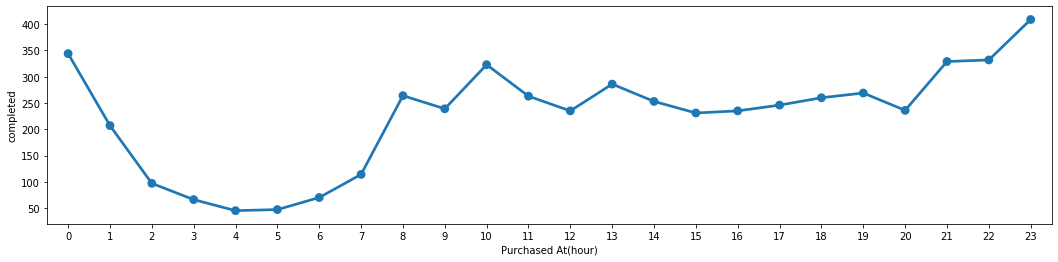

In [113]:
figure, ax = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 4)
sns.pointplot(data=table_hour.reset_index(), x="Purchased At(hour)", y="completed", ax=ax)

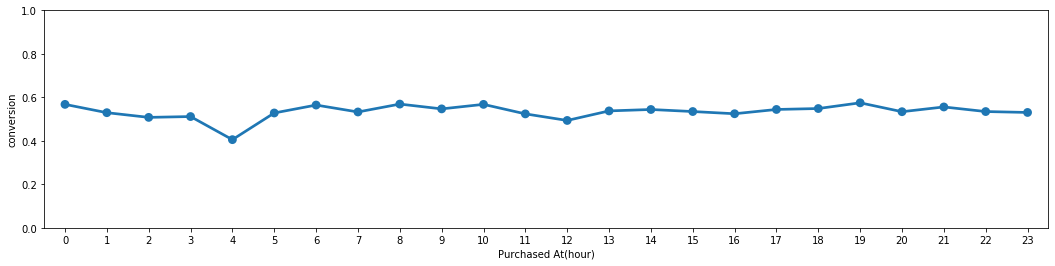

In [129]:
figure, ax = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 4)
plt.ylim(0, 1)
sns.pointplot(data=table_hour.reset_index(), x="Purchased At(hour)", y="conversion", ax=ax)

In [114]:
# 요일별 결제/캔슬/환불 비율

data["Purchased At(weekday)"] = data["Purchased At"].dt.weekday_name

In [116]:
table_week = pd.pivot_table(data, index = "Purchased At(weekday)",values = "Name", columns = "Status", aggfunc = len , fill_value=0)

In [121]:
table_week["total"] = table_week["completed"] + table_week["cancelled"] + table_week["refunded"]
table_week["conversion"] = table_week["completed"] / table_week["total"]

In [123]:
weekday_columns = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
table_week.loc[weekday_columns]

Status,cancelled,completed,refunded,total,conversion
Purchased At(weekday),,,,,
Monday,691,863,93,1647,0.523983
Tuesday,694,935,102,1731,0.540150
Wednesday,679,953,90,1722,0.553426
Thursday,616,813,88,1517,0.535926
Friday,490,674,56,1220,0.552459
Saturday,412,537,73,1022,0.525440
Sunday,428,625,88,1141,0.547765


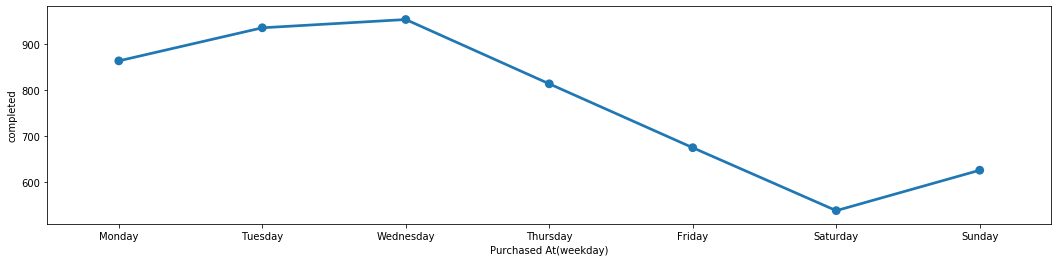

In [125]:
figure, ax = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 4)
sns.pointplot(data=table_week.reset_index(), x="Purchased At(weekday)", y="completed", order=weekday_columns, ax=ax)

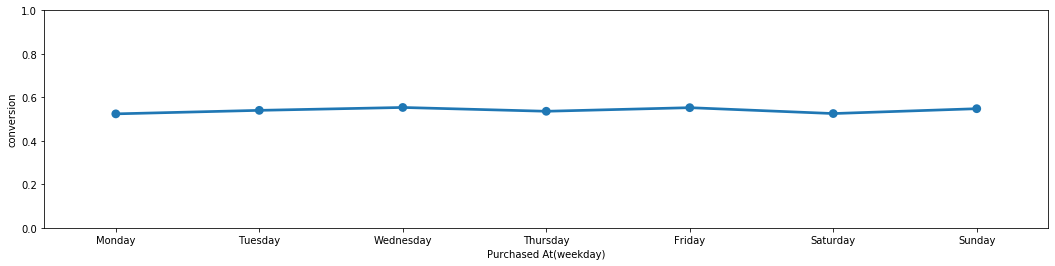

In [126]:
figure, ax = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 4)
plt.ylim(0, 1)
sns.pointplot(data=table_week.reset_index(), x="Purchased At(weekday)", y="conversion", order=weekday_columns, ax=ax)

4. 채널별 결제 / 캔슬 / 환불 비율

In [130]:
data["Channel"].value_counts()

facebook     6880
others       1390
naver        1009
direct        297
email         271
google        120
instagram      33
Name: Channel, dtype: int64

In [132]:
table0= pd.pivot_table(data,index = "Channel", values = "Name", columns = "Status", aggfunc=len, fill_value = 0)
table0["total"] = table0["cancelled"]+table0["completed"]+table0["refunded"]
table0["conversion"] = table0["completed"] / table0["total"]

In [133]:
table0.sort_values(by="conversion",ascending=False)

Status,cancelled,completed,refunded,total,conversion
Channel,,,,,
email,93,155,23,271,0.571956
direct,119,169,9,297,0.569024
naver,386,568,55,1009,0.562934
others,545,771,74,1390,0.554676
google,42,66,12,120,0.550000
facebook,2812,3654,414,6880,0.531105
instagram,13,17,3,33,0.515152


## 코치 데이터 분석

1. 사용자 데이터와 코치 데이터 통합

In [138]:
core_data=data[["Name","Status"]]
coach_data = pd.concat([core_data,coach],axis=1)
coach_data

,Name,Status,Name,Status,정은오 코치(VEV4PGJB),오승혁 코치(VENPKBP9),조소은 코치(D0WASBXN),고영재 코치(C91AVNGB),조수민 코치(OBCAO3W0),강채아 코치(WH2NIKCO),...,오초빈 코치(A3WOLAQM),서수정 코치(F36LORFC),정서율 코치(LX1G7EMD),고우재 코치(SKNL9Z4P),문한규 코치(OU1WVDGA),황세안 코치(3QUBQAVE),홍성은 코치(2I3QJQ5O),고성은 코치(34T7XPYR),백한율 코치(HPWAN8R0),안슬은 코치(QAVWJSZ1)
Access Code,,,,,,,,,,,,,,,,,,,,,
Y9RY2VSI,김승혜,completed,김승혜,completed,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3GTN3S3B,허승준,completed,허승준,completed,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6B0IG276,이지민,completed,이지민,completed,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
EMGRU2MO,장설윤,completed,장설윤,completed,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1ELG96TX,서성빈,completed,서성빈,completed,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2GHCC4T1,정성연,cancelled,정성연,cancelled,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ERJUS7LV,장세현,cancelled,장세현,cancelled,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
QJ0M8FE7,배수이,completed,배수이,completed,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
U9AELHAT,배소정,completed,배소정,completed,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


2. 코치별 구매 완료 횟수(completed) / 캔슬 횟수(canceled) / 환불 횟수(refunded) / 담당 사용자(total)

In [145]:
coach_table = pd.pivot_table(coach,columns="Status",aggfunc="sum",fill_value=0)
coach_table["total"] = coach_table["cancelled"] + coach_table["completed"] +coach_table["refunded"]
coach_table.head()

Status,cancelled,completed,refunded,total
강은우 코치(EJIHL7OE),122,171,16,309
강지희 코치(NOEP7X8B),15,19,1,35
강채아 코치(WH2NIKCO),9,10,2,21
고성은 코치(34T7XPYR),24,36,1,61
고수이 코치(NKHXTMRU),6,5,1,12


3. 코치별 전환율(conversion rate) / 취소율(cancellation rate)

In [146]:
coach_table["conversion rate"] = coach_table["completed"]/coach_table["total"]

In [147]:
coach_table["cancellation"] = coach_table["cancelled"]/coach_table["total"]

In [148]:
coach_table.head()

Status,cancelled,completed,refunded,total,conversion rate,cancellation
강은우 코치(EJIHL7OE),122,171,16,309,0.553398,0.394822
강지희 코치(NOEP7X8B),15,19,1,35,0.542857,0.428571
강채아 코치(WH2NIKCO),9,10,2,21,0.476190,0.428571
고성은 코치(34T7XPYR),24,36,1,61,0.590164,0.393443
고수이 코치(NKHXTMRU),6,5,1,12,0.416667,0.500000


In [155]:
# 코칭 100회 최소 기준
coach_table = coach_table[coach_table["total"]>=100]

In [157]:
# 전환률  상위 5명
coach_table.sort_values(by="conversion rate",ascending=False).head()

Status,cancelled,completed,refunded,total,conversion rate,cancellation
조우찬 코치(WWN531JQ),36,65,6,107,0.607477,0.336449
허슬지 코치(DWVG5IFL),43,71,3,117,0.606838,0.367521
허성원 코치(9124O1IH),43,76,7,126,0.603175,0.341270
조설영 코치(U7L98DAO),48,78,6,132,0.590909,0.363636
권슬영 코치(E3GD4106),42,70,9,121,0.578512,0.347107


In [158]:
# 취소율 상위 5명
coach_table.sort_values(by="cancellation",ascending=False).head()

Status,cancelled,completed,refunded,total,conversion rate,cancellation
박도영 코치(I4KVQ5G0),77,70,6,153,0.457516,0.503268
조수민 코치(OBCAO3W0),49,46,8,103,0.446602,0.475728
조초연 코치(3JBE9GKO),55,56,5,116,0.482759,0.474138
오동완 코치(0O48DQCH),55,56,7,118,0.474576,0.466102
서수정 코치(F36LORFC),48,53,2,103,0.514563,0.466019
